In [2]:
from pytrends.request import TrendReq
#create a pytrend object, request data from google trends
pytrends=TrendReq(hl='en-US')

#extract data about keywords
keywords=['Python', 'R', 'C++', 'Java', 'HTML']
pytrends.build_payload(keywords, timeframe='today 5-y')

#specify and get data
data=pytrends.interest_over_time()
data


,Python,R,C++,Java,HTML,isPartial
date,,,,,,
2017-09-17,21,65,80,32,16,False
2017-09-24,21,59,80,32,16,False
2017-10-01,20,58,79,29,15,False
2017-10-08,21,61,80,31,16,False
2017-10-15,21,60,78,30,15,False
...,...,...,...,...,...,...
2022-08-07,32,49,90,23,13,False
2022-08-14,31,48,83,22,12,False
2022-08-21,34,49,89,24,14,False


In [3]:
type(data)

pandas.core.frame.DataFrame

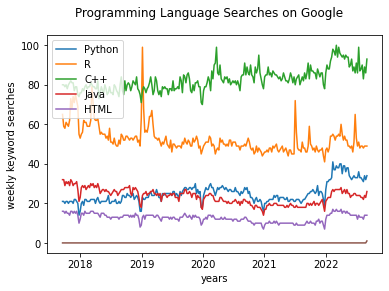

In [9]:
#plot data
import matplotlib.pyplot as plt

plt.plot(data)

#add titles
plt.suptitle("Programming Language Searches on Google")
plt.xlabel('years')
plt.ylabel('weekly keyword searches')

#add legend
plt.legend(keywords, loc ='upper left')
plt.savefig('data.png')

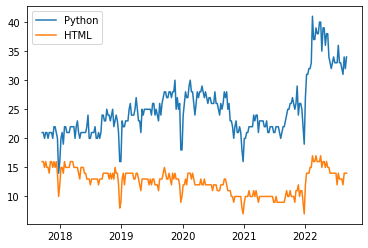

In [13]:
#analyze data 
focus=['Python', 'HTML']

plt.plot(data[focus])
plt.legend(focus)

In [22]:
#extract  xountry-level  data about the keywords
data2=pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)

#get  countries with the most searches of 'Python' over years
data2=data2['Python'].nlargest(10)
data2

geoName
China          50
Israel         39
Eritrea        37
St. Helena     31
Singapore      26
South Korea    26
Russia         25
Taiwan         23
Hong Kong      22
Iceland        22
Name: Python, dtype: int32

In [16]:
type(data2)

pandas.core.series.Series

In [23]:
#convert to dataframe
data2=data2.to_frame()
data2

,Python
geoName,
China,50
Israel,39
Eritrea,37
St. Helena,31
Singapore,26
South Korea,26
Russia,25
Taiwan,23
Hong Kong,22


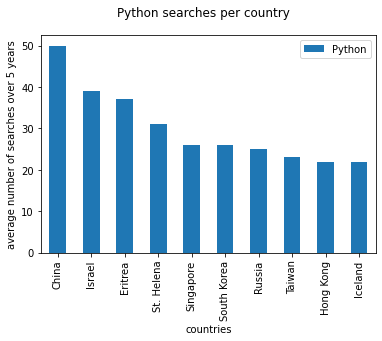

In [20]:
#plot barcharts with pandas
data2.plot(kind='bar')

#add titles
plt.suptitle('Python searches per country')
plt.xlabel('countries')
plt.ylabel('average number of searches over 5 years')
plt.show()

In [29]:
#plot a barchart with multiple keywords
data3=pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3=data3[55:60]
data3

,Python,R,C++,Java,HTML
geoName,,,,,
Cuba,15,15,47,14,9
Curaçao,8,33,47,6,6
Cyprus,15,20,46,10,9
Czechia,15,23,42,12,8
Côte d’Ivoire,7,16,51,20,6


<AxesSubplot:xlabel='geoName'>

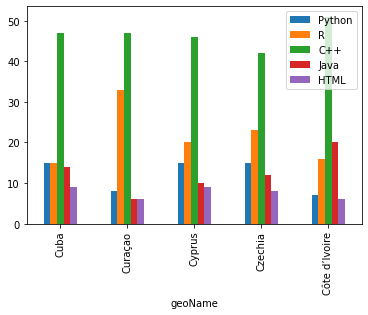

In [30]:
data3.plot(kind='bar')